##### Histograms in OpenCV

In [2]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('Everestgray.png',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [5]:
hist.shape

(256, 1)

In [6]:
print(hist)

[[  903.]
 [  774.]
 [ 1131.]
 [ 1426.]
 [ 1788.]
 [ 2193.]
 [ 2531.]
 [ 2782.]
 [ 3222.]
 [ 3456.]
 [ 3749.]
 [ 4200.]
 [ 4732.]
 [ 5383.]
 [ 6245.]
 [ 7303.]
 [ 8367.]
 [ 9572.]
 [10354.]
 [11033.]
 [11267.]
 [11635.]
 [11795.]
 [12145.]
 [12620.]
 [13013.]
 [13205.]
 [13158.]
 [13378.]
 [13137.]
 [12841.]
 [12717.]
 [12231.]
 [12037.]
 [11915.]
 [11476.]
 [11320.]
 [11357.]
 [11376.]
 [11449.]
 [11373.]
 [11214.]
 [10951.]
 [11140.]
 [11090.]
 [10810.]
 [11023.]
 [10891.]
 [11090.]
 [11330.]
 [11286.]
 [11303.]
 [11818.]
 [12283.]
 [12523.]
 [12748.]
 [12907.]
 [13362.]
 [13636.]
 [13937.]
 [14325.]
 [14500.]
 [15059.]
 [15318.]
 [15380.]
 [15559.]
 [15648.]
 [15839.]
 [16410.]
 [17113.]
 [18110.]
 [19338.]
 [20301.]
 [21289.]
 [21582.]
 [21358.]
 [20791.]
 [20864.]
 [21541.]
 [22840.]
 [24440.]
 [24941.]
 [25558.]
 [24999.]
 [24813.]
 [25053.]
 [25687.]
 [27498.]
 [30168.]
 [32866.]
 [34864.]
 [35475.]
 [34358.]
 [33203.]
 [32913.]
 [32993.]
 [32888.]
 [31618.]
 [28570.]
 [25327.]


In [7]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

In [9]:
print(hist)

[  903   774  1131  1426  1788  2193  2531  2782  3222  3456  3749  4200
  4732  5383  6245  7303  8367  9572 10354 11033 11267 11635 11795 12145
 12620 13013 13205 13158 13378 13137 12841 12717 12231 12037 11915 11476
 11320 11357 11376 11449 11373 11214 10951 11140 11090 10810 11023 10891
 11090 11330 11286 11303 11818 12283 12523 12748 12907 13362 13636 13937
 14325 14500 15059 15318 15380 15559 15648 15839 16410 17113 18110 19338
 20301 21289 21582 21358 20791 20864 21541 22840 24440 24941 25558 24999
 24813 25053 25687 27498 30168 32866 34864 35475 34358 33203 32913 32993
 32888 31618 28570 25327 22568 20403 19147 18153 17352 16444 15699 15569
 16039 16613 17786 17855 17076 16633 16175 15972 15735 14679 13200 11718
 10824 10298  9661  8933  7998  7355  6584  5976  5457  5053  4919  4542
  4419  4271  4069  3981  3972  3907  3797  3900  3946  4059  3906  3943
  3650  3527  3398  3242  2959  2909  2843  2799  2782  2696  2706  2488
  2619  2667  2566  2566  2561  2613  2562  2567  2

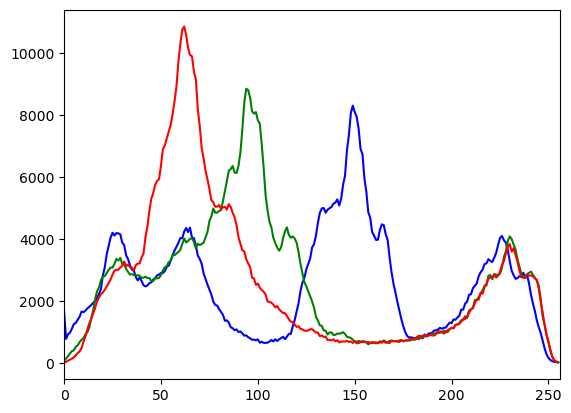

In [12]:
img = cv2.imread('Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

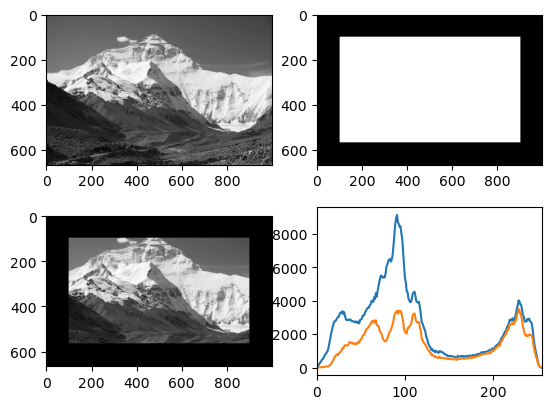

In [13]:
img = cv2.imread('Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:566, 100:900] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

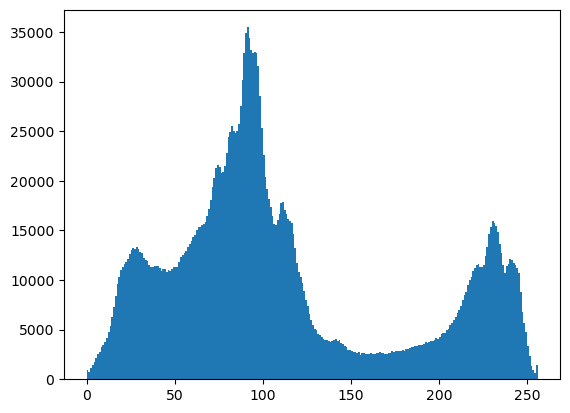

In [10]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

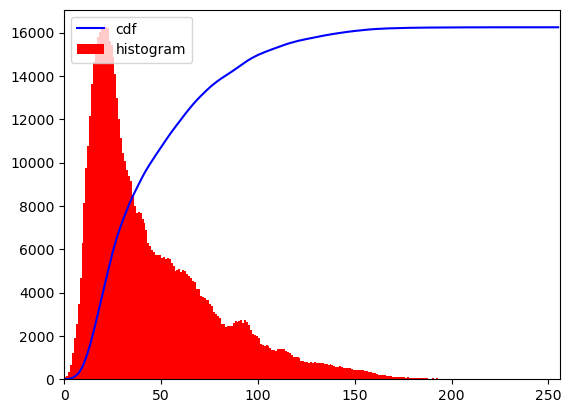

In [21]:
img = cv2.imread('sunset-5163192_960_720.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [22]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [23]:
img2 = cdf[img]

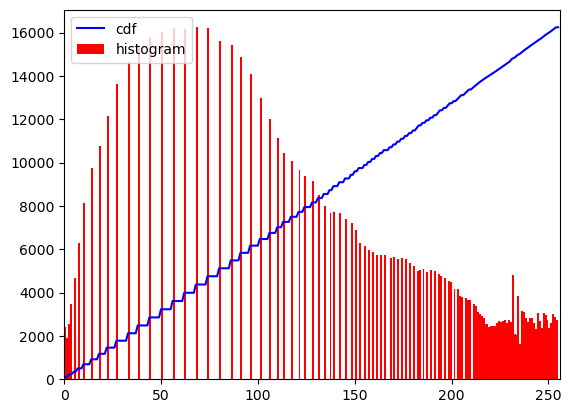

In [24]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

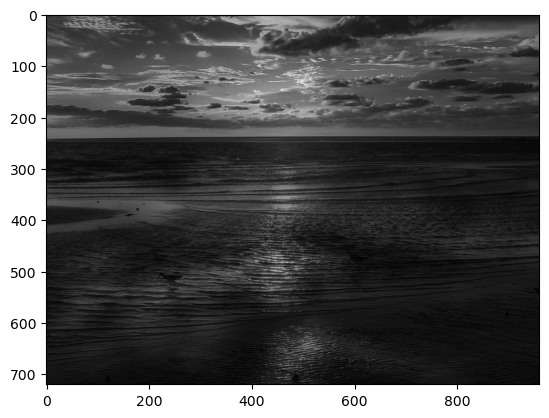

In [25]:
plt.imshow(img, 'gray')
plt.show()

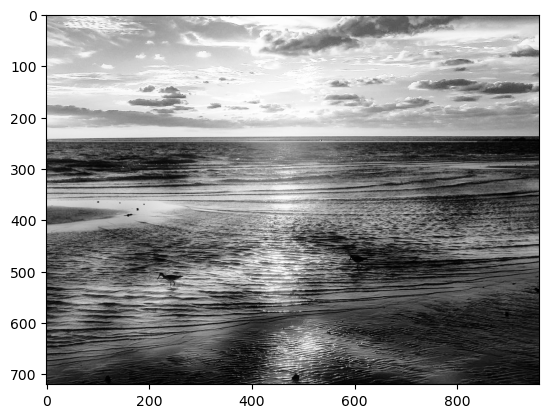

In [26]:
plt.imshow(img2, 'gray')
plt.show()